In [1]:
import argparse
import midi
import os

from constants import *
from dataset import load_all
from generate import write_file, generate
from play_music_util import play_music

import pygame
import base64

# from playsound import playsound
import numpy as np
import copy 

/opt/miniconda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
import math
import time
from IPython import display
import matplotlib.pyplot as plt
from tqdm import tqdm
from torch import optim
%matplotlib inline

import torch, torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
import torch

In [3]:
styles = [['data/Bach1']]
styles[0]

['data/Bach1']

In [4]:
print('Loading data')
train_data, train_labels = load_all(styles, BATCH_SIZE, SEQ_LEN)

Loading data


In [5]:
train_data[0].shape

(81, 128, 48, 3)

In [6]:
from model import Generator, iterate_minibatches, compute_loss, train, time_axis

In [7]:
generator = Generator()
generator.cuda()

Generator(
  (dropout): Dropout(p=0.3)
  (time_ax): time_axis(
    (attention_layer): MultiHeadedAttention(
      (linears): ModuleList(
        (0): Linear(in_features=78, out_features=78, bias=False)
        (1): Linear(in_features=78, out_features=78, bias=False)
        (2): Linear(in_features=78, out_features=78, bias=False)
      )
      (linear): Linear(in_features=78, out_features=78, bias=False)
      (dropout): Dropout(p=0.1)
    )
    (FF): PositionwiseFeedForward(
      (w_1): Linear(in_features=78, out_features=312, bias=True)
      (w_2): Linear(in_features=312, out_features=78, bias=True)
      (dropout): Dropout(p=0.1)
    )
    (time_lstm): LSTM(78, 256, num_layers=2, batch_first=True, dropout=0.1)
    (dropout): Dropout(p=0.5, inplace)
    (generate_features): feature_generation(
      (padding): ZeroPad2d(padding=(11, 12, 0, 0), value=0)
      (conv): Conv1d(3, 64, kernel_size=(24,), stride=(1,))
    )
  )
  (note_ax): note_axis(
    (note_lstm): LSTM(259, 128, num_l

In [8]:
print(generator.note_ax.temperature)
print(generator.note_ax.apply_T)

1
False


In [9]:
X_tr = train_data[0][:-1]
X_te = train_data[0][-1:]
y_tr = train_labels[0][:-1]
y_te = train_labels[0][-1:]

In [10]:
X_tr.shape, X_te.shape

((80, 128, 48, 3), (1, 128, 48, 3))

Epoch 18 of 50 took 2.987s
current train loss: 0.051090751877563886
current val loss: 0.04026041924953461


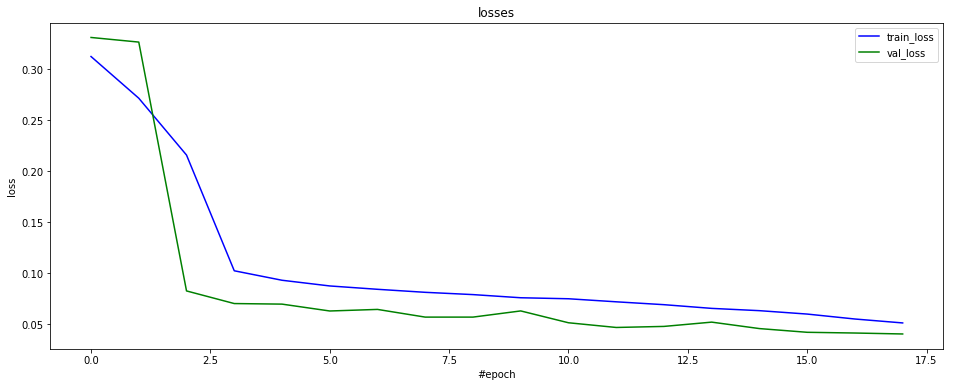

18it [00:00, 23.44it/s]

In [ ]:
generator, epoch_history = train(generator, X_tr, X_te, y_tr, y_te, 
                                 batchsize=1, n_epochs = 50)

In [ ]:
generator, epoch_history = train(generator, X_tr, X_te, y_tr, y_te, 
                                 batchsize=1, n_epochs = 50)

In [23]:
# generator, epoch_history = train(generator, X_tr, X_te, y_tr, y_te, 
#                                  batchsize=1, n_epochs = 50)

In [24]:
# generator.eval

## Save/load the model

In [37]:
# from model import Generator, iterate_minibatches, compute_loss, train
# torch.save(generator.state_dict(), os.path.join(OUT_DIR, 'model_test'))
# torch.save(generator.state_dict(), os.path.join(OUT_DIR, 'model_canonical_attention'))
# torch.save(generator.state_dict(), os.path.join(OUT_DIR, 'model_canonical_attention_without_mul'))
# the_model = Generator()
# generator = Generator()
# generator.load_state_dict(torch.load(os.path.join(OUT_DIR, 'model_canonical_attention')))
# generator.load_state_dict(torch.load(os.path.join(OUT_DIR, 'generator_rl')))

In [36]:
generator.note_ax.temperature

1

In [27]:
# print(the_model)
# for i in list(the_model.note_ax.note_lstm.parameters()):
#     print(i.shape)

# Canonical

In [34]:
generator.cuda()
write_file('output/canonical_test', generate(generator, 16, to_train=False))


  1%|          | 2/256 [00:00<00:16, 15.23it/s]

Generating with no styles:



100%|██████████| 256/256 [00:09<00:00, 26.56it/s]

Writing file out/samples/output/canonical_test_0.mid


In [20]:
# midi_file = 'out/samples/output/canonical_test_0.mid'
# play_music(midi_file)